# Transforming Data and Distance Functions

In this notebook we do a few things with the [NBA Salary Dataset](https://github.com/joshrosson/NBASalaryPredictions) to illustrate working with relationships between variables. Specifically we'll look at distances between *observations* in this dataset and see what we can learn!


In [ ]:
# first, mount your google drive, change to the course folder, pull latest changes, and change to the lab folder.
# Startup Magic to: (1) Mount Google Drive
# (2) Change to Course Folder
# (3) Pull latest Changes
# (4) Move to the Demo Directory so that the data files are available

from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/cmps3160
!git pull
%cd _demos

In [1]:
# Includes and Standard Magic...
### Standard Magic and startup initializers.

# Load Numpy
import numpy as np
# Load MatPlotLib
import matplotlib
import matplotlib.pyplot as plt
# Load Pandas
import pandas as pd
# Load Stats
from scipy import stats
import seaborn as sns

# This lets us show plots inline and also save PDF plots if we want them
%matplotlib inline
from matplotlib.backends.backend_pdf import PdfPages
matplotlib.style.use('fivethirtyeight')

# These two things are for Pandas, it widens the notebook and lets us display data easily.
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

# Show a ludicrus number of rows and columns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Supress scientific notation
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Loading the Data and Down Selecting

First we'll load the data and focus on just a few attributes to make this more clear.

In [2]:
# Load the data
# Data from here: https://github.com/joshrosson/NBASalaryPredictions
df_nba = pd.read_csv("./data/nba_stats.csv")
display(df_nba.head(10))

# Always double check your Dtypes
df_nba.dtypes

,Season,Name,Salary,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1995,A.C. Green,6473000.00,SF,31,PHO,82,52,2687,311,617,0.50,43,127,0.34,268,490,0.55,251,343,0.73,194,475,669,127,55,31,114,146,916
1,1995,Aaron McKie,845000.00,SG,22,POR,45,20,827,116,261,0.44,11,28,0.39,105,233,0.45,50,73,0.69,35,94,129,89,36,16,39,97,293
2,1995,Aaron Swinson,nan,SF,24,PHO,9,0,51,10,18,0.56,0,0,nan,10,18,0.56,4,5,0.80,3,5,8,3,1,0,5,8,24
3,1995,Aaron Williams,nan,PF,23,MIL,15,0,72,8,24,0.33,0,1,0.00,8,23,0.35,8,12,0.67,5,14,19,0,2,6,7,14,24
4,1995,Acie Earl,1040000.00,C,24,BOS,30,3,208,26,68,0.38,0,0,nan,26,68,0.38,14,29,0.48,19,26,45,2,6,8,14,39,66
5,1995,Adam Keefe,1650000.00,SF,24,UTA,75,0,1270,172,298,0.58,0,0,nan,172,298,0.58,117,173,0.68,135,192,327,30,36,25,62,141,461
6,1995,Adrian Caldwell,225000.00,PF,28,HOU,7,0,30,1,4,0.25,0,0,nan,1,4,0.25,3,6,0.50,1,9,10,0,1,0,1,6,5
7,1995,Alaa Abdelnaby,nan,PF,26,TOT,54,0,506,118,231,0.51,0,2,0.00,118,229,0.52,20,35,0.57,37,77,114,13,15,12,45,104,256
8,1995,Alaa Abdelnaby,nan,PF,26,SAC,51,0,476,117,220,0.53,0,2,0.00,117,218,0.54,20,35,0.57,34,72,106,13,15,12,40,102,254
9,1995,Alaa Abdelnaby,nan,PF,26,PHI,3,0,30,1,11,0.09,0,0,nan,1,11,0.09,0,0,nan,3,5,8,0,0,0,5,2,2


Season      int64
Name       object
Salary    float64
Pos        object
Age         int64
Tm         object
G           int64
GS          int64
MP          int64
FG          int64
FGA         int64
FG%       float64
3P          int64
3PA         int64
3P%       float64
2P          int64
2PA         int64
2P%       float64
FT          int64
FTA         int64
FT%       float64
ORB         int64
DRB         int64
TRB         int64
AST         int64
STL         int64
BLK         int64
TOV         int64
PF          int64
PTS         int64
dtype: object

Is the data for NBA Salary skewed?  Why?

In [3]:
# Let's use all the years this time but only a subset of the stats.

# Why did I copy this time?
df_smallNBA = df_nba[["Name", "Salary", "Season", "Pos", "Age", "MP", "PTS","TRB", "AST"]].copy()
df_smallNBA.head(10)

,Name,Salary,Season,Pos,Age,MP,PTS,TRB,AST
0,A.C. Green,6473000.00,1995,SF,31,2687,916,669,127
1,Aaron McKie,845000.00,1995,SG,22,827,293,129,89
2,Aaron Swinson,nan,1995,SF,24,51,24,8,3
3,Aaron Williams,nan,1995,PF,23,72,24,19,0
4,Acie Earl,1040000.00,1995,C,24,208,66,45,2
5,Adam Keefe,1650000.00,1995,SF,24,1270,461,327,30
6,Adrian Caldwell,225000.00,1995,PF,28,30,5,10,0
7,Alaa Abdelnaby,nan,1995,PF,26,506,256,114,13
8,Alaa Abdelnaby,nan,1995,PF,26,476,254,106,13
9,Alaa Abdelnaby,nan,1995,PF,26,30,2,8,0


# Find the closest players!


In [4]:
# Get a smaller set, drop NA's and get dummies...
df_smallNBA.dropna(inplace=True)
df_smallNBA.reset_index(drop=True, inplace=True)
df_smallNBA.head(10)

,Name,Salary,Season,Pos,Age,MP,PTS,TRB,AST
0,A.C. Green,6473000.00,1995,SF,31,2687,916,669,127
1,Aaron McKie,845000.00,1995,SG,22,827,293,129,89
2,Acie Earl,1040000.00,1995,C,24,208,66,45,2
3,Adam Keefe,1650000.00,1995,SF,24,1270,461,327,30
4,Adrian Caldwell,225000.00,1995,PF,28,30,5,10,0
5,Alonzo Mourning*,4560000.00,1995,C,24,2941,1643,761,111
6,Alton Lister,300000.00,1995,C,36,776,167,236,12
7,Andrew Lang,1964000.00,1995,C,28,2340,794,456,72
8,Anfernee Hardaway,5230000.00,1995,PG,23,2901,1613,336,551
9,Anthony Avent,950000.00,1995,PF,25,1066,258,293,41


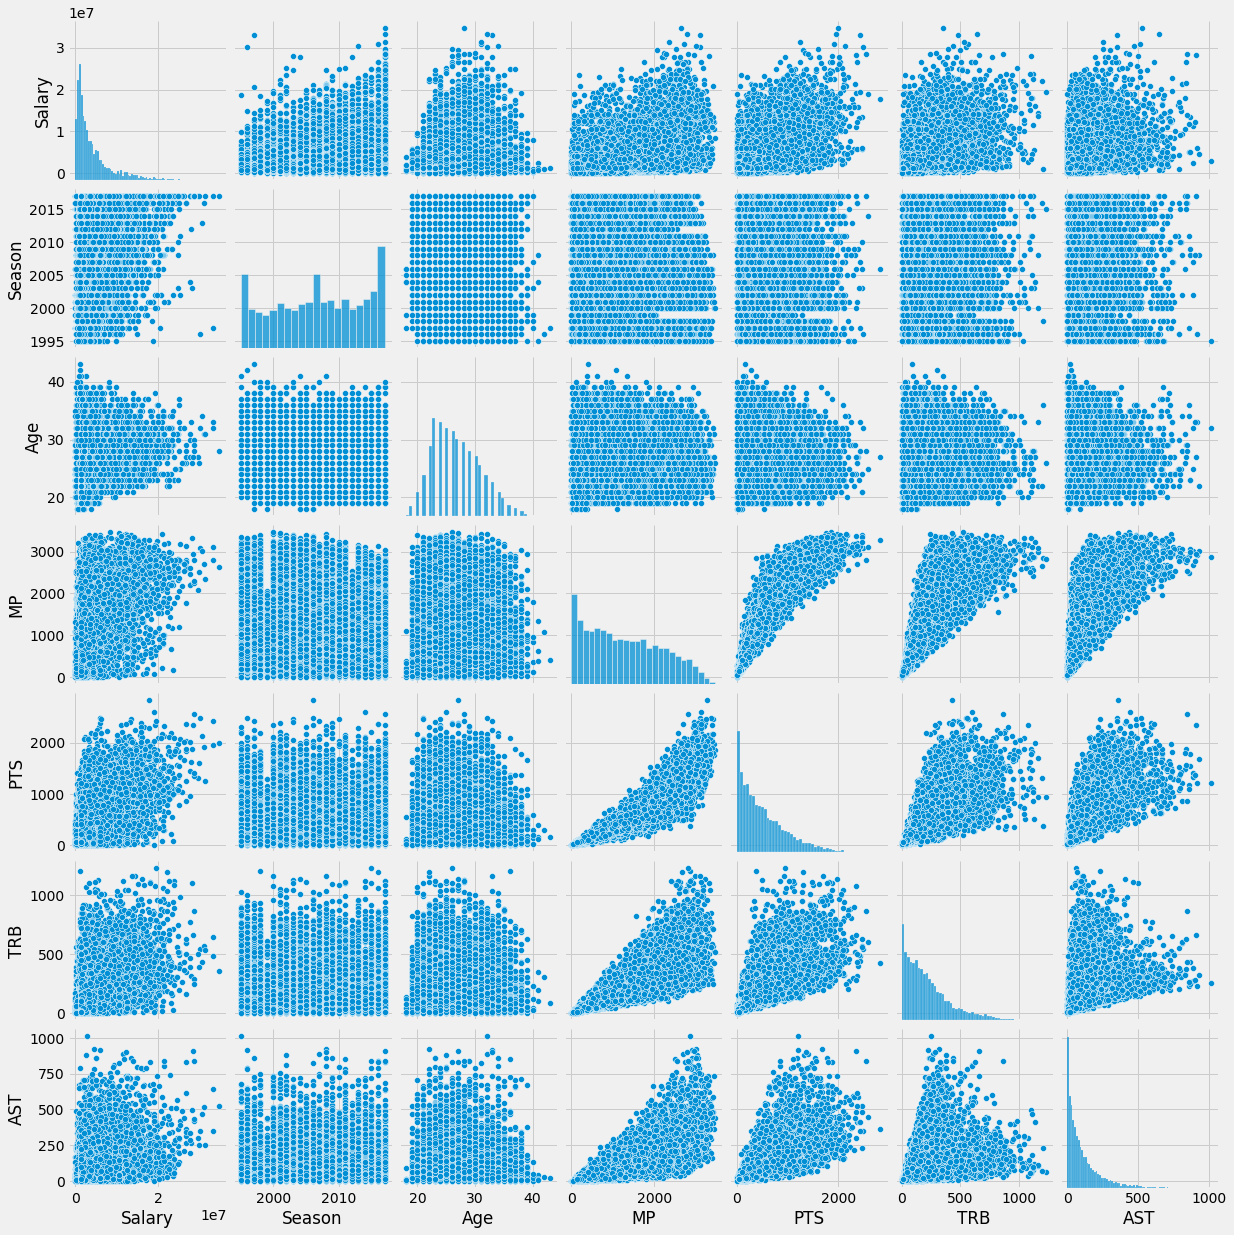

In [5]:
sns.pairplot(df_smallNBA)

In [6]:
# get dummies -- Why did I remove name? How do we get it back?
df_ml = pd.get_dummies(df_smallNBA[["Season", "Pos", "Age", "MP", "PTS","TRB", "AST"]])
display(df_ml.head(10))
len(df_ml)

,Season,Age,MP,PTS,TRB,AST,Pos_C,Pos_C-PF,Pos_PF,Pos_PF-C,Pos_PF-SF,Pos_PG,Pos_PG-SF,Pos_PG-SG,Pos_SF,Pos_SF-PF,Pos_SF-SG,Pos_SG,Pos_SG-PF,Pos_SG-PG,Pos_SG-SF
0,1995,31,2687,916,669,127,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,1995,22,827,293,129,89,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,1995,24,208,66,45,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1995,24,1270,461,327,30,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1995,28,30,5,10,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
5,1995,24,2941,1643,761,111,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,1995,36,776,167,236,12,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,1995,28,2340,794,456,72,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,1995,23,2901,1613,336,551,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
9,1995,25,1066,258,293,41,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


9354

In [7]:
df_ml.Season.value_counts()

2015    540
2017    487
2016    478
2014    471
2011    468
2009    456
2008    440
2005    435
2001    430
2004    422
2013    406
2010    386
1996    385
2002    384
2012    375
1997    374
2003    367
2000    362
2006    354
2007    353
1998    346
1995    321
1999    314
Name: Season, dtype: int64

We're going to start using [SKLearn](https://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics) we'll get more into it as we go!

In [8]:
# Use SKLEARN to do some distances.
from sklearn.metrics import pairwise_distances
D = pairwise_distances(df_ml, metric="euclidean")
D.shape


(9354, 9354)

In [9]:
# Find someone intersting...
df_smallNBA[(df_smallNBA['Name'] == 'Anthony Davis')]

,Name,Salary,Season,Pos,Age,MP,PTS,TRB,AST
6995,Anthony Davis,5375760.00,2013,PF,19,1846,867,522,63
7406,Anthony Davis,5607240.00,2014,PF,20,2358,1394,673,105
7878,Anthony Davis,7070730.00,2015,PF,21,2455,1656,696,149
8416,Anthony Davis,22116750.00,2016,C,22,2164,1481,627,116
8892,Anthony Davis,23775506.00,2017,C,23,2708,2099,886,157


In [10]:
# So what does this D matrix have inside of it?
D

array([[   0.        , 2034.90933459, 2696.84871656, ..., 1068.36463813,
         910.99560921, 1523.56621123],
       [2034.90933459,    0.        ,  670.31410548, ..., 1099.62948305,
        1296.76944751,  541.81731238],
       [2696.84871656,  670.31410548,    0.        , ..., 1756.20898529,
        1932.96249317, 1184.85146748],
       ...,
       [1068.36463813, 1099.62948305, 1756.20898529, ...,    0.        ,
         462.491081  ,  713.37437577],
       [ 910.99560921, 1296.76944751, 1932.96249317, ...,  462.491081  ,
           0.        ,  816.20034305],
       [1523.56621123,  541.81731238, 1184.85146748, ...,  713.37437577,
         816.20034305,    0.        ]])

In [11]:
# So let's see who was the closest to Davis's 2016 Season
D[8416, :].argmin()

8416

In [12]:
# Wait... that's me... what went wrong here?
np.fill_diagonal(D, np.inf)

# To fix this we have to fill the diagonal with infs to fill it out

In [13]:
D[8416, :].argmin()

6805

In [14]:
df_smallNBA.loc[[6805]]

# 2012 Kevin love who dis? Explains why Lebron wanted that trade hunh?

,Name,Salary,Season,Pos,Age,MP,PTS,TRB,AST
6805,Kevin Love,13668750.00,2012,PF,23,2145,1432,734,111


In [16]:
df_ml.loc[[8416,6805]]


,Season,Age,MP,PTS,TRB,AST,Pos_C,Pos_C-PF,Pos_PF,Pos_PF-C,Pos_PF-SF,Pos_PG,Pos_PG-SF,Pos_PG-SG,Pos_SF,Pos_SF-PF,Pos_SF-SG,Pos_SG,Pos_SG-PF,Pos_SG-PG,Pos_SG-SF
8416,2016,22,2164,1481,627,116,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6805,2012,23,2145,1432,734,111,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


Lots of different distances we could use [SKLearn Distance Functions](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.DistanceMetric.html)

In [19]:
# If we change the distance metric what happens?


D = pairwise_distances(df_ml, metric="hamming")
np.fill_diagonal(D, np.inf)
D[8416, :].argmin()

8399

In [21]:
df_smallNBA.loc[[8416,8399]]

,Name,Salary,Season,Pos,Age,MP,PTS,TRB,AST
8416,Anthony Davis,22116750.00,2016,C,22,2164,1481,627,116
8399,Alex Len,4823621.00,2016,C,22,1821,703,594,97
